In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Childhood Respiratory Disease

Keywords: polynomial regression, multiple regression.

## Description

FEV (forced expiratory volume) is an index of pulmonary function that measures the volume of air expelled after one second of constant effort. The data contains determinations of FEV on 654 children ages 6-22 who were seen in the Childhood Respiratory Desease Study in 1980 in East Boston, Massachusetts. The data are part of a larger study to follow the change in pulmonary function over time in children.

ID	 - 	ID number
Age	 - 	years
FEV	 - 	litres
Height	 - 	inches
Sex	 - 	Male or Female
Smoker	 - 	Non = nonsmoker, Current = current smoker


## Source

Tager, I. B., Weiss, S. T., Rosner, B., and Speizer, F. E. (1979). Effect of parental cigarette smoking on pulmonary function in children. American Journal of Epidemiology, 110, 15-26.
Rosner, B. (1990). Fundamentals of Biostatistics, 3rd Edition. PWS-Kent, Boston, Massachusetts.


In [3]:
# Read the csv file into a pandas DataFrame

smoking = pd.read_csv('../Resources/smoking.csv')
smoking.head()

,Id,Age,FEV,Height,Sex,Smoker
0,301,9,1.708,57.0,Female,Non
1,451,8,1.724,67.5,Female,Non
2,501,7,1.720,54.5,Female,Non
3,642,9,1.558,53.0,Male,Non
4,901,9,1.895,57.0,Male,Non


In [4]:
# create PandasDummies Transformer
from sklearn.base import BaseEstimator, TransformerMixin
class PandasDummies(BaseEstimator, TransformerMixin):
    def transform(self, X, *_):
        return pd.get_dummies(X)
    
    def fit(self, *_):
        return self

In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = smoking[['Id', 'Age', 'Height', 'Sex', 'Smoker']]
y = smoking["FEV"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(654, 5) (654, 1)


In [7]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [8]:
lr_model = make_pipeline(PandasDummies(), StandardScaler(), LinearRegression())
lr_model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('pandasdummies', PandasDummies()), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [9]:
type(LinearRegression()).__name__

'LinearRegression'

In [10]:
def create_pipeline(model):
    return make_pipeline(PandasDummies(), StandardScaler(), model)

In [11]:
def get_model_name(model):
    return type(model).__name__

In [12]:
models = [
    (get_model_name(model), create_pipeline(model).fit(X_train, y_train)) 
    for model in [LinearRegression(), ElasticNet(), Ridge(), Lasso()]
]
models

[('LinearRegression', Pipeline(memory=None,
       steps=[('pandasdummies', PandasDummies()), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])),
 ('ElasticNet', Pipeline(memory=None,
       steps=[('pandasdummies', PandasDummies()), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('elasticnet', ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
        max_iter=1000, normalize=False, positive=False, precompute=False,
        random_state=None, selection='cyclic', tol=0.0001, warm_start=False))])),
 ('Ridge', Pipeline(memory=None,
       steps=[('pandasdummies', PandasDummies()), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
     normalize=False, random_state=None, solver='auto', tol=0.001))])),
 ('Lasso', 

In [22]:
models

[('LinearRegression', Pipeline(memory=None,
       steps=[('pandasdummies', PandasDummies()), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])),
 ('ElasticNet', Pipeline(memory=None,
       steps=[('pandasdummies', PandasDummies()), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('elasticnet', ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
        max_iter=1000, normalize=False, positive=False, precompute=False,
        random_state=None, selection='cyclic', tol=0.0001, warm_start=False))])),
 ('Ridge', Pipeline(memory=None,
       steps=[('pandasdummies', PandasDummies()), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
     normalize=False, random_state=None, solver='auto', tol=0.001))])),
 ('Lasso', 

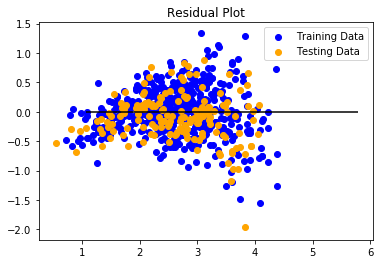

In [13]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions
def make_plot(model):
    ### BEGIN SOLUTION
    predictions = model.predict(X_test)
    model.fit(X_train, y_train)
    plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
    plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
    plt.legend()
    plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
    plt.title("Residual Plot")
    plt.show()
    ### END SOLUTION
make_plot(lr_model)

In [14]:
from sklearn.metrics import mean_squared_error
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
def quantify(model):
    ### BEGIN SOLUTION
    MSE = mean_squared_error(y_test, model.predict(X_test))
    r2 = model.score(X_test, y_test)
    ### END SOLUTION
    print(f"MSE: {MSE}, R2: {r2}")

quantify(lr_model)

MSE: 0.1668232937645407, R2: 0.7945077385497901


In [ ]:
mo